
# Task 1. Data Preparation

In [197]:
# README.TXT file 

!cat README.TXT

COMP41680/COMP47670 Assignment 2
----------------------------------

## SUMMARY 

This assignment involves working with a dataset of bank customer satisfaction survey responses. The general objective here is to predict whether customers are satisfied with the bank based on their survey responses. The dataset consists of two different representations for the same set of customers:

1. Tabular data (bank-tabular.csv) which contains demographic information about each customer and ratings scores (1-5) relating to different aspects of their bank. A manually-labelled ‘satisfied’ variable indicates whether a customer is ‘satisfied’ or ‘dissatisfied’ with the bank.

2. Text data (bank-comments.csv) which contains short textual comments indicating customers' opinions regarding the bank. 


## FILE FORMATS 

The file bank-tabular.csv is a tab-separated text file containing the following fields:

 - customer_id: A unique identifier for each customer.
 - date: The date on which the survey was cond

In [198]:
# Load the bank-tabular.csv data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bank_data = pd.read_csv("bank-tabular.csv", sep="\t")
# The sep='\t' parameter tells pandas to use a tab character as the separator instead of the default comma.
bank_data.head()

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


## Data Exploration 

In [199]:
bank_data.tail()

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True
2999,109281,2022-10-04,Male,42.0,NaN,Business,True,False,2.0,3.0,5.0,5.0,2.0,2.0,2.0,2.0,3.0,True


In [200]:
bank_data.shape

(3000, 18)

In [201]:
print(bank_data.dtypes)


customer_id                int64
date                      object
customer_gender           object
customer_age             float64
customer_location         object
customer_type             object
has_cc                      bool
has_mortgage                bool
convenience              float64
customer_service         float64
online_banking           float64
interest_rates           float64
fees_charges             float64
community_involvement    float64
products_services        float64
privacy_security         float64
reputation               float64
satisfied                   bool
dtype: object


In [202]:
bank_data.columns

Index(['customer_id', 'date', 'customer_gender', 'customer_age',
       'customer_location', 'customer_type', 'has_cc', 'has_mortgage',
       'convenience', 'customer_service', 'online_banking', 'interest_rates',
       'fees_charges', 'community_involvement', 'products_services',
       'privacy_security', 'reputation', 'satisfied'],
      dtype='object')

In [203]:
bank_data.isnull().sum()

customer_id                0
date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

In [204]:
bank_data["customer_gender"].value_counts()

Female           1124
Male             1057
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64

In [205]:
bank_data["customer_location"].value_counts()

Leinster    1248
Munster      777
Connacht     379
Ulster       231
Name: customer_location, dtype: int64

In [206]:
bank_data["customer_type"].value_counts()

Business         1461
Personal         1371
Business-Plus     168
Name: customer_type, dtype: int64

In [207]:
bank_data["has_cc"].value_counts()

True     2512
False     488
Name: has_cc, dtype: int64

In [208]:
bank_data["has_mortgage"].value_counts()

False    2052
True      948
Name: has_mortgage, dtype: int64

In [209]:
# Discriptive statistice of the customer age. 

print("Customer Age Range is [%.1f, %.1f]" % (bank_data["customer_age"].min(), bank_data["customer_age"].max()))
print("Customer Age Mean is %.1f" % bank_data["customer_age"].mean())
print("Customer Age Median is %.1f" % bank_data["customer_age"].median())
print("Customer Age Standard deviation is %.1f" % bank_data["customer_age"].std())

Customer Age Range is [18.0, 92.0]
Customer Age Mean is 47.3
Customer Age Median is 48.0
Customer Age Standard deviation is 14.7


## Histograms of raw data

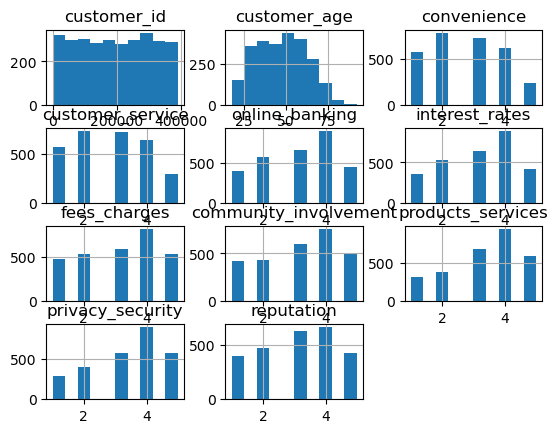

In [210]:
bank_data.hist()
plt.show()

## Data Preprocessing / Cleaning 

####  dropped the column customer id as this feature is not that useful for further analysis

In [211]:
# dropped the column customer id 
new_data = bank_data.drop("customer_id", axis=1)
new_data.head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


#### Converting values 'f' to Female, values 'm' to Male and 'Unspecified' to Not specified of the 'customer_gender' column. 

In [212]:
# Converting values 'f' to Female, values 'm' to Male and 'Unspecified' to Not specified:

new_data['customer_gender'] = new_data['customer_gender'].replace({'f': 'Female', 'm': 'Male', 'Unspecified': 'Not specified'})
new_data.head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,2022-03-13,Female,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


#### Simply dropping all the missing values from the dataset

In [213]:

withNo_bank_data = new_data.dropna()
withNo_bank_data.shape


(1209, 17)

### Handlling Missing Data 
#### Dropping the missing values only form the hte categirical features 'customer_gender' and 'customer_location' and replacing the missing age values and score values with the mean values in each columns which contains numerical values.


In [214]:
# Dropping the missing values only from the categorical features 'customer_gender' and 'customer_location'
new_data.dropna(subset=['customer_gender', 'customer_location'], inplace=True)

# Replace the missing age values and score values with the mean values in each column which contains numerical values.
# First Creating a list of column names
columns = ['customer_age',
           'convenience', 
           'customer_service', 
           'online_banking', 
           'interest_rates', 
           'fees_charges', 
           'community_involvement', 
           'products_services', 
           'privacy_security', 
           'reputation']

# Loop through each column and replace missing values with the mean
for col in columns:
    mean_score = new_data[col].mean()
    new_data[col].fillna(mean_score, inplace=True)
    
cleaned_bank_data = new_data
cleaned_bank_data.head().round(2)

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.00,5.0,2.0,4.0,True
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.00,4.0,5.0,5.0,True
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,3.16,4.0,4.0,3.1,True
3,2022-03-13,Female,47.5,Leinster,Business,True,False,2.7,4.0,5.0,1.0,5.0,5.00,5.0,5.0,5.0,True
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.00,4.0,5.0,2.0,False


In [215]:
cleaned_bank_data.shape

(2365, 17)

## Histograms of cleaned data

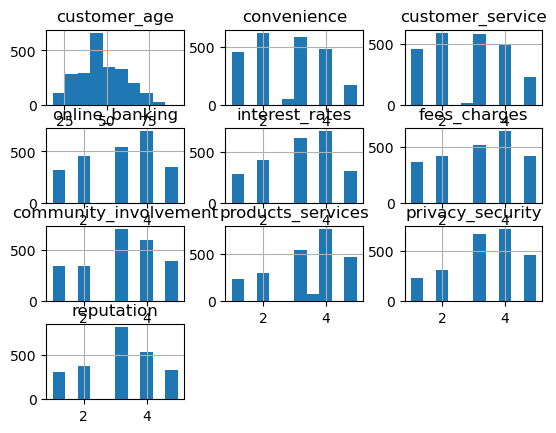

In [216]:
cleaned_bank_data.hist()
plt.show()

# Task 2. Data Characterisation

Analyse, characterise, and summarise the cleaned tabular dataset, using tables and visualisations where appropriate. This should include the analysis of customer demographic features and numeric ratings features. You should also explore temporal aspects of the data (e.g. whether customer satisfaction levels are changing over time). 

In [217]:
# Sort by customer age by deceding order
cleaned_bank_data.sort_values(by="customer_age", ascending = False).head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
185,2021-09-24,Female,92.0,Leinster,Business,True,False,2.0,2.0,3.0,3.0,1.0,3.157129,2.0,2.0,3.0,False
1548,2022-06-06,Male,91.0,Leinster,Business-Plus,True,False,3.0,4.0,4.0,3.0,2.0,1.000000,4.0,1.0,4.0,False
1035,2022-09-01,Female,88.0,Leinster,Personal,True,False,4.0,4.0,3.0,4.0,4.0,5.000000,5.0,5.0,3.0,False
1961,2022-02-06,Male,86.0,Leinster,Business,True,False,4.0,4.0,3.0,3.0,5.0,5.000000,5.0,5.0,2.0,False
1549,2021-04-04,Not specified,86.0,Leinster,Personal,True,False,5.0,4.0,3.0,4.0,5.0,5.000000,5.0,5.0,1.0,True


In [218]:
# sort by age by ascending order
cleaned_bank_data.sort_values(by="customer_age", ascending=True).head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
326,2021-09-05,Male,18.0,Leinster,Business,True,False,5.0,5.0,4.0,2.0,2.000000,4.0,1.0,5.0,3.0,True
2576,2021-10-01,Female,18.0,Connacht,Personal,True,True,2.0,2.0,2.0,1.0,4.000000,1.0,1.0,1.0,4.0,False
2339,2022-12-13,Male,18.0,Leinster,Personal,True,True,5.0,5.0,5.0,2.0,3.138395,4.0,4.0,4.0,4.0,True
1355,2021-10-06,Female,18.0,Leinster,Business-Plus,True,False,4.0,1.0,3.0,1.0,4.000000,3.0,3.0,4.0,4.0,False
1538,2021-05-28,Male,18.0,Ulster,Business-Plus,True,False,2.0,3.0,2.0,4.0,4.000000,1.0,4.0,3.0,1.0,False


## Summary Statistics 

In [219]:
# missing values replaced with mean values (data size 2365, 16) to not to lose too much data. 

cleaned_bank_data.describe().round(2)

,customer_age,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
count,2365.0,2365.0,2365.00,2365.00,2365.00,2365.00,2365.00,2365.00,2365.0,2365.00
mean,47.5,2.7,2.77,3.12,3.16,3.14,3.16,3.40,3.4,3.10
std,13.5,1.2,1.25,1.27,1.21,1.33,1.27,1.22,1.2,1.21
min,18.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00
25%,38.0,2.0,2.00,2.00,2.00,2.00,2.00,3.00,3.0,2.00
50%,47.5,3.0,3.00,3.00,3.00,3.00,3.16,4.00,3.4,3.10
75%,56.0,4.0,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00
max,92.0,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00


This is a summary of the statistical results of the ratings data for each feature service. 
From this data, we can see that the average ratings for each service features range from 2.71 for convenience to 3.4 for privacy_security and reputation. The ratings have a standard deviation ranging from 1.20 for privacy_security and reputation to 1.33 for fees_charges. The data also shows that the customers are generally satisfied with the services, with the median rating for all services being 3.0 or higher.

## Correlation Matrix 

In [220]:
cleaned_bank_data.corr(numeric_only=True).round(2)

,customer_age,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
customer_age,1.00,-0.19,-0.02,-0.01,0.01,0.16,0.08,0.04,0.05,-0.01,-0.04,0.04,0.09
has_cc,-0.19,1.00,-0.02,0.00,-0.00,-0.00,-0.01,-0.00,0.02,0.02,0.03,0.02,-0.01
has_mortgage,-0.02,-0.02,1.00,-0.09,-0.11,-0.16,-0.24,-0.16,-0.04,-0.04,-0.05,-0.07,-0.44
convenience,-0.01,0.00,-0.09,1.00,0.45,0.27,0.12,0.17,0.06,0.06,0.08,0.12,0.29
customer_service,0.01,-0.00,-0.11,0.45,1.00,0.26,0.05,0.06,-0.02,0.02,0.03,0.04,0.21
online_banking,0.16,-0.00,-0.16,0.27,0.26,1.00,0.30,0.21,0.09,0.07,0.10,0.22,0.46
interest_rates,0.08,-0.01,-0.24,0.12,0.05,0.30,1.00,0.32,0.11,0.07,0.07,0.34,0.35
fees_charges,0.04,-0.00,-0.16,0.17,0.06,0.21,0.32,1.00,0.25,0.25,0.25,0.39,0.33
community_involvement,0.05,0.02,-0.04,0.06,-0.02,0.09,0.11,0.25,1.00,0.28,0.29,0.07,0.23
products_services,-0.01,0.02,-0.04,0.06,0.02,0.07,0.07,0.25,0.28,1.00,0.35,0.06,0.20


The table represents a correlation matrix, where each column and row represent a variable and each cell shows the correlation between the two variables in that row and column. Correlation measures the strength and direction of a linear relationship between two variables, and it ranges from -1 to 1. The main diagonal of the table (from the upper left to the lower right) shows the correlation between each variable and itself, which is always 1. The off-diagonal elements represent the correlation between two different variables.

The correlation between satisfied and other features are as follows: 'customer_age' = very weak positive correlation (0.09) 'has_cc' = very weak negative correlation (-0.01) 'has_mortgage' = moderate negative correlation (-0.44) 'convenience' = moderate positive correlation (0.29) 'customer_service' = moderate positive correlation (0.21) 'online_banking' = strong positive correlation (0.46) 'interest_rates' = moderate positive correlation (0.35) 'fees_charges' = moderate positive correlation (0.33) 'community_involvement' = weak positive correlation (0.23) 'products_services' = weak positive correlation (0.20) 'privacy_security' = weak positive correlation (0.21) 'reputation' = weak positive correlation (0.23)

This suggests that customers who are more satisfied tend to have a stronger positive correlation with features such as online_banking, interest_rates ,convenience , customer_service, and fees_charges. On the other hand, customers who are less satisfied tend to have a stronger negative correlation with the has_mortgage.

##  Visualisation of the correlations through a Heatmap

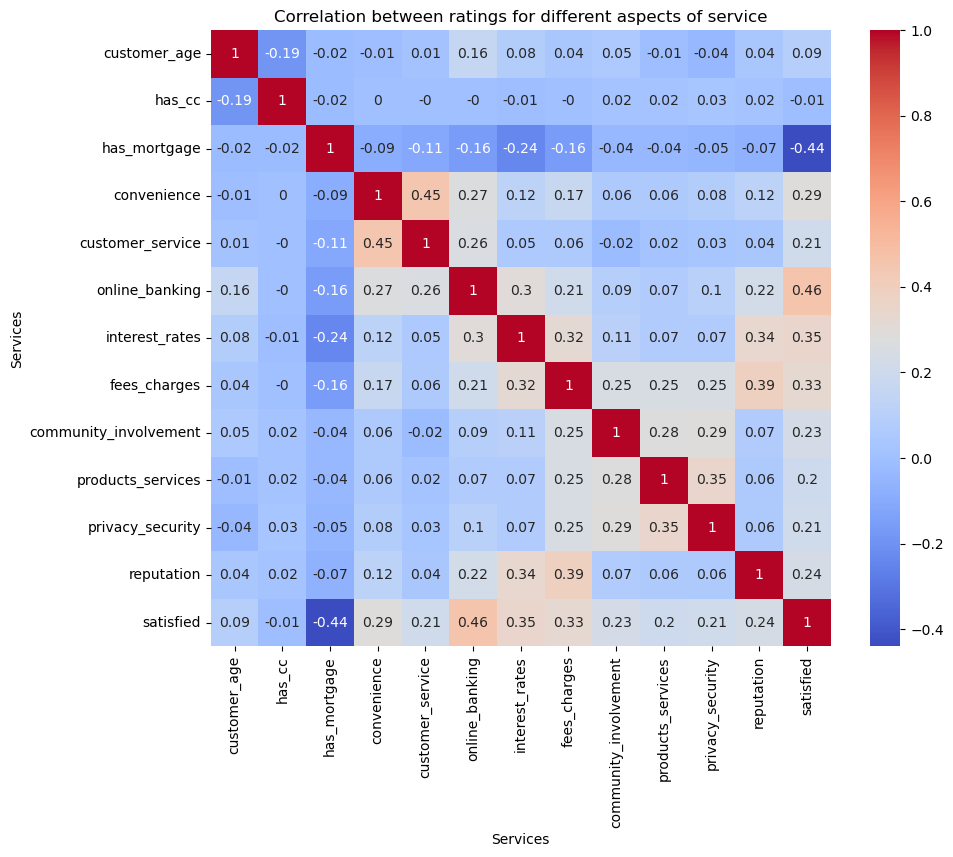

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = cleaned_bank_data.corr(numeric_only=True).round(2)

# Set figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Add title and labels
plt.title('Correlation between ratings for different aspects of service')
plt.xlabel('Services')
plt.ylabel('Services')
plt.show()



The heatmap visualise the correlation matrix above between different service. The heatmap is color-coded with a cool-to-warm color scale, where cool colors represent negative correlation and warm colors represent positive correlation. Each cell in the heatmap is annotated with its correlation coefficient.

## Histogram/density plot of customer_age and a bar chart of customer_location

Text(0, 0.5, 'Count')

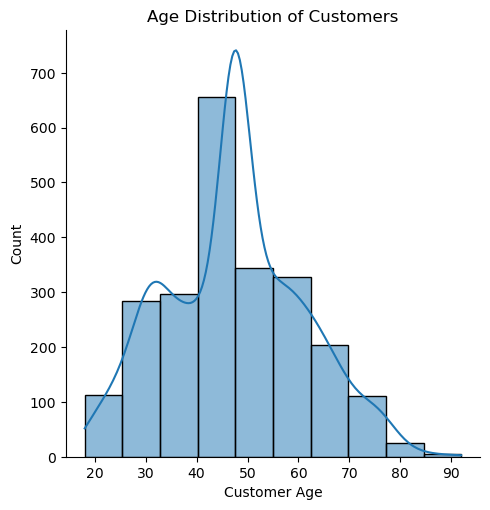

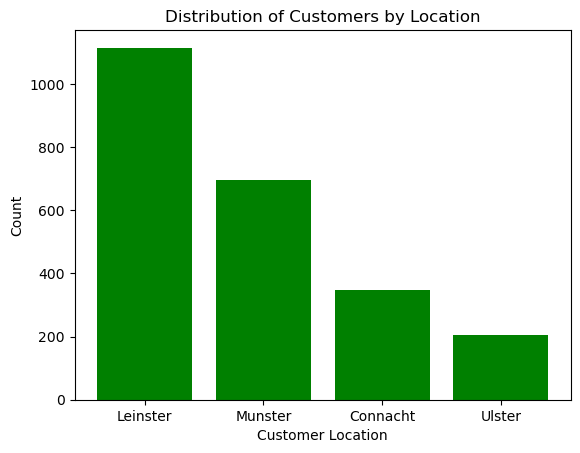

In [222]:
# Histogram/density plot of customer_age

sns.displot(cleaned_bank_data, x="customer_age", kde=True, bins=10)
plt.title("Age Distribution of Customers")
plt.xlabel("Customer Age")
plt.ylabel("Count")

# Bar chart of customer_location

location_counts = cleaned_bank_data["customer_location"].value_counts()
plt.figure()
plt.bar(location_counts.index, location_counts.values, color="green")
plt.title("Distribution of Customers by Location")
plt.xlabel("Customer Location")
plt.ylabel("Count")

The first plot is a histogram of customer ages, which shows the distribution of age ranges among the customers in our dataset. The x-axis shows the age ranges, and the y-axis shows the frequency of customers in each range.From this histogram, we can see that the majority of customers fall in the age range of 35 to 60, with a peak around 45.(Note: that the missing value of age had beed replaced with the mean age).The age range of customers in the dataset is between 18 and 92, with a fairly even distribution across this range.

The second plot is a bar chart showing the distribution of customers across different regions. The x-axis shows the different regions, and the y-axis shows the number of customers in each region.From this bar chart, we can see that the majority of customers are located in Leinster and Munster, with a relatively small number in Connacht and Ulster.

## A grouped bar chart of customer_gender, customer_location and customer_type

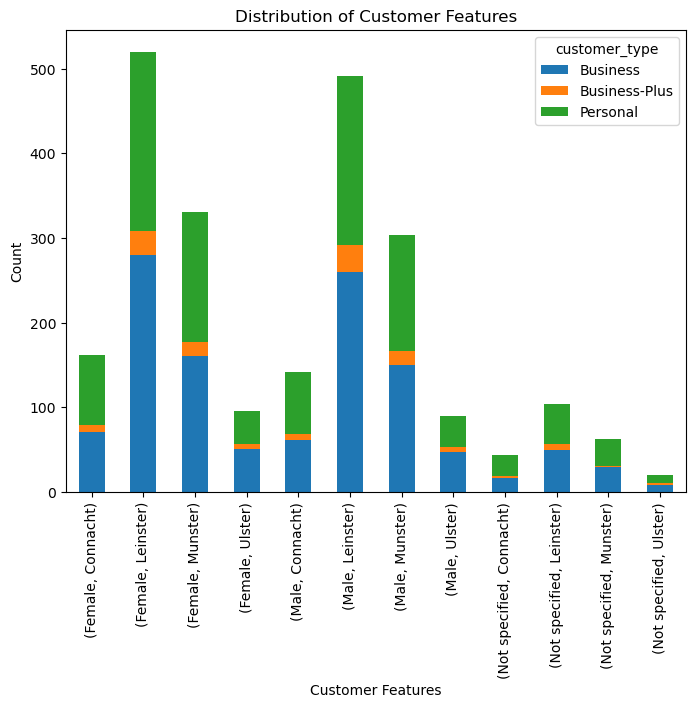

In [223]:
# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8,6))
cleaned_bank_data.groupby(['customer_gender', 'customer_location', 'customer_type']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set axis labels and title
ax.set_xlabel('Customer Features')
ax.set_ylabel('Count')
ax.set_title('Distribution of Customer Features')
plt.show()


The stacked bar chart shows the distribution of customers based on their gender, location, and type. The chart has three main categories on the x-axis: customer_gender, customer_location, and customer_type. The y-axis shows the count of customers in each category.

#  Task 3. Tabular Data Classification

In [224]:
cleaned_bank_data["satisfied"].value_counts()

False    1368
True      997
Name: satisfied, dtype: int64

The target variable or dependent variable, which is the column I want to predict. The service_data contains the predictor variables or independent variables, which are the columns I use to predict the target variable.

In [225]:
target = cleaned_bank_data["satisfied"].values
service_data = cleaned_bank_data[["convenience", "customer_service", 
                  "online_banking", "interest_rates",
                  "fees_charges", "community_involvement", 
                  "products_services", "privacy_security","reputation"]]

The datasets is plited into two sets: training set and test set. The service_data contains the independent features and target contains the dependent feature or simply target. The train_test_split function splits the data into four sets: data_train, data_test, target_train, target_test. The test_size parameter specifies the proportion of the dataset that should be used for testing, which is set to 20%. This means that 80% of the data is used for training and 20% is used for testing.

In [226]:
from sklearn.model_selection import train_test_split

# use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(service_data, target, test_size=0.2)
print("Training set has %d examples" % X_train.shape[0])
print("Test set has %d examples" % X_test.shape[0])

Training set has 1892 examples
Test set has 473 examples


The complete dataset is randomly splited into a training test and a test set 20% (0.2) of the data will be used for the test set. The remaining 80% will be used to train the model.

##  Support Vector Machines (SVM) Classification 

In [227]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier on the training data
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test data
y_predict = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

# Print the accuracy of the SVM classifier
print(f"SVM accuracy: {accuracy:.3f}")

SVM accuracy: 0.793


The Support Vector Machine (SVM) classifier on a training data set using a linear kernel, and then evaluates the performance of the classifier on a separate test data set. The output shows that the accuracy of the SVM classifier on the test data set is 0.793, which means that the classifier is able to correctly classify about 79.3% of the test data samples.

### Confusion Matrix (SVM) Classifier

In [228]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the SVM classifier
conf_matrix = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[234  51]
 [ 47 141]]


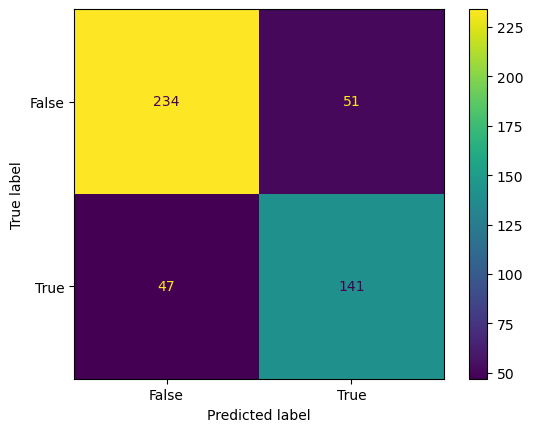

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()


Confusion_matrix from the sklearn.metrics module that creates a confusion matrix for the predicted labels compared to the true labels. A confusion matrix is a table that summarizes the performance of a classification algorithm by comparing the predicted labels to the true labels.

It shows the true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) of the model. The rows represent the actual values of the target variable, and the columns represent the predicted values of the target variable.

Looking at the matrix, we can see that there were 234 true negatives (TN), 141 true positives (TP), 47 false negatives (FN), and 51 false positives (FP). The true negatives and true positives represent the instances that were correctly classified, while the false negatives and false positives represent the instances that were misclassified.

### K-Fold Cross Validation to the (SVM) Classifire

In [230]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation with k=5
scores = cross_val_score(svm, X_train, y_train, cv=10)

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", scores.mean())

Accuracy for each fold:  [0.75263158 0.75789474 0.8042328  0.75661376 0.82539683 0.77777778
 0.78835979 0.76190476 0.77248677 0.8042328 ]
Mean accuracy:  0.7801531606794765


The k-fold cross-validation with k=10 on an SVM classifier is performed. The output shows the accuracy of each fold in the scores array, which is an array of length 10, indicating the accuracy of each fold. The mean accuracy of the model is calculated by taking the average of the accuracy scores of all folds. The mean accuracy across all 10 folds is approximately 0.78, which indicates that the SVM classifier has a reasonable level of accuracy on this dataset.

The output shows the accuracy for each fold, which ranges from 0.752 to 0.825. The mean accuracy is calculated to be 0.780, indicating that the SVM model performs reasonably well on the dataset.

## K-Nearest Neighbors (KNN) classification

In [231]:
# use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(service_data, target, test_size=0.2)

# build a KNN classifier (k=3 neighbours) based on the training data:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(X_train, y_train)

# Making predictions on the test set and evaluating them using the standard classification accuracy score:

predicted = knn.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

acc = accuracy_score(target_test, predicted)
print("Accuracy=%.3f" % acc)

Accuracy=0.507


A different classifier the K-Nearest Neighbors (KNN) classification is used to classify the test data. The algorithm is built with n_neighbors=3, meaning that the KNN classifier will consider the 3 closest neighbors in the training set to determine the class of the test sample.

The accuracy of the KNN classifier is 0.507 which indicates that the model is not performing well in predicting the target values. This could be due to the small number of neighbors used to make the predictions (k=3), which might not be enough to capture the underlying patterns in the data. 

### K-NN Confusion Matrix (KNN) Classifier

In [232]:

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Print the confusion matrix
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[236  40]
 [ 66 131]]


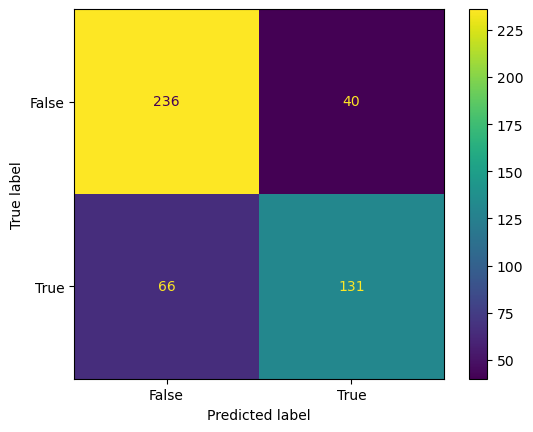

In [233]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Get the unique classes
classes = np.unique(np.concatenate((y_test, predicted), axis=0))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()


The confusion matrix for the KNN calssifier shows that the model correctly predicted 236 instances of the first class (true positives) and 131 instances of the second class (true negatives). However, it incorrectly predicted 66 instances of the first class as the second class (false negatives) and 40 instances of the second class as the first class (false positives).

### K-Fold cross validation to the  (KNN) classifier

In [234]:
from sklearn.model_selection import cross_val_score

# Split the data into 10 folds for cross-validation
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_train, y_train, cv=10)
mean_accuracy = scores.mean()

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", scores.mean())

Accuracy for each fold:  [0.75789474 0.81052632 0.81481481 0.7989418  0.73015873 0.79365079
 0.76190476 0.70899471 0.80952381 0.7989418 ]
Mean accuracy:  0.7785352269562795


The result shows the mean accuracy obtained by performing k-fold cross-validation with k=10 using a K-nearest neighbor (KNN) classifier with k=3 on the training data. The result shows the accuracy for each of the 10 folds and the mean accuracy. The accuracy for each fold ranges from 0.708 to 0.815, and the mean accuracy across all folds is 0.779. This means that the KNN classifier is able to correctly classify around 78% of the samples on average. However, the accuracy varies between the folds, indicating that the performance of the classifier may be sensitive to the choice of training and validation data.

### Feature importances for a KNN classifier

In [235]:
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(service_data, target)
result = permutation_importance(knn, service_data, target, n_repeats=10, random_state=0)

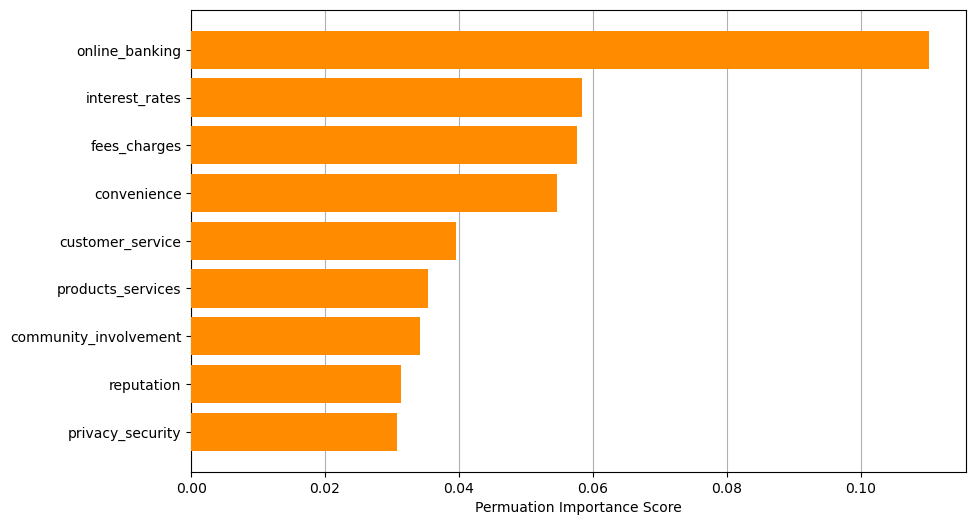

In [236]:
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(service_data.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T, color="darkorange", zorder=3)
ax.xaxis.grid(True)
ax.set_xlabel("Permuation Importance Score");

Feature importances for a KNN classifier is calculated and shown in the graph above using the the permutation_importance function from the sklearn.inspection module. Specifically, it creates a KNeighborsClassifier object with 3 neighbors, fits it to the service_data and target data, and then calculates the feature importances using permutation importance with 10 repetitions and a random state of 0. The features are sorted by their mean importance score. The sorted feature names are used as the y-axis labels, while the x-axis displays the permutation importance score for each feature. 

In [237]:
# reversed order
ranked_features = list(service_data.columns[sorted_idx])
ranked_features.reverse()
#top 4 features
subset_top4 = ranked_features[0:4]
subset_top4

['online_banking', 'interest_rates', 'fees_charges', 'convenience']

The top four features by their importance in K-NN. 

## Random Forest Classification 

In [238]:
from sklearn.ensemble import RandomForestClassifier

# use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(service_data, target, test_size=0.2)

# Initialise the random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Predict the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8181818181818182


Above the random forest classifier is initialized with 100 decision trees. Then, the classifier is fit to the training data (X_train and y_train). After that, the classifier predicts the target values for the test data (X_test), and the accuracy of the predicted values is calculated by comparing them with the actual target values (y_test). The accuracy score, which represents the proportion of correct predictions made by the classifier. Here the result shows an accuracy of 0.818, indicating that the random forest classifier is correctly predicting the label of the service requests for about 82% of the cases.

### Confusion Matrix Random Forest Classifier

In [239]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[240  22]
 [ 64 147]]


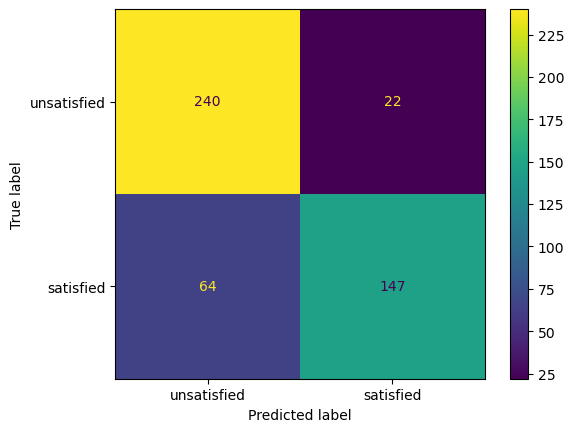

In [240]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['unsatisfied', 'satisfied'])
disp.plot()


### K-Fold cross validation to the Random Forest Classifier 

In [241]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation
scores = cross_val_score(rfc, X_train, y_train, cv=10)

# each fold accuracy and the mean accuracy
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", scores.mean())


Accuracy for each fold:  [0.79473684 0.78421053 0.80952381 0.73015873 0.7989418  0.78306878
 0.8042328  0.83597884 0.87301587 0.7989418 ]
Mean accuracy:  0.8012809802283487


The 10-fold cross-validation using the random forest classifier (rfc) on theX_train and y_train datasets. The results shows the accuracy score for each fold, which ranges from 0.73 to 0.87, indicating some variation in the accuracy across folds. The mean accuracy is 0.80. 

# Task 4. Text Data Classification 

In [242]:
import pandas as pd 
import numpy as np
raw_comments_data = pd.read_csv("bank-comments.csv", sep="\t")
raw_comments_data.head()

,customer_id,date,comments
0,216604,2022-08-22,"Overal, this bank is satisfactory."
1,259276,2022-11-23,Easy to find zhe bank ' s branches and ATMs. A...
2,265459,2022-01-21,Bank's phone app is really great. In general a...
3,58770,2022-03-13,NaN
4,318031,2022-08-08,NaN


In [243]:
print(raw_comments_data.shape)
print(bank_data.shape)

(3000, 3)
(3000, 18)


In [244]:
new_comments_data = raw_comments_data.drop(["customer_id", "date"], axis=1)
new_comments_data.head()

,comments
0,"Overal, this bank is satisfactory."
1,Easy to find zhe bank ' s branches and ATMs. A...
2,Bank's phone app is really great. In general a...
3,NaN
4,NaN


In [245]:
# merged the two datasets bank data and comment data.
merged_data = bank_data.join(new_comments_data,how="inner")

# drop the all the missing values in the dataset
cleaned_merged_data = merged_data.dropna()

print (cleaned_merged_data.shape)
cleaned_merged_data.head(2)

(1010, 19)


,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,comments
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True,"Overal, this bank is satisfactory."
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True,Easy to find zhe bank ' s branches and ATMs. A...


In [246]:
subset_data = cleaned_merged_data[["comments", "satisfied"]]
subset_data.head()

,comments,satisfied
0,"Overal, this bank is satisfactory.",True
1,Easy to find zhe bank ' s branches and ATMs. A...,True
8,i guess that my bank is committed to sustainab...,True
9,Its time für your bank to make meaningful chan...,False
13,It' ' s important ho me that my bank is [[comm...,True


In [247]:
subset_data.shape

(1010, 2)

There are 1010 seperate comments documents. 

In [248]:
# create a subset of only the comments feature

comments_subset = cleaned_merged_data["comments"]
comments_subset.head()

0                    Overal, this bank is satisfactory.
1     Easy to find zhe bank ' s branches and ATMs. A...
8     i guess that my bank is committed to sustainab...
9     Its time für your bank to make meaningful chan...
13    It' ' s important ho me that my bank is [[comm...
Name: comments, dtype: object

## Tokenization text and couunts Method 

In [249]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [250]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_subset)
print(X.shape)

(1010, 980)


### Document one, which is the first comment from the list of comments documents.

In [251]:
doc1 = comments_subset.iloc[0]
print(doc1[0:10])
print(doc1)

Overal, th
Overal, this bank is satisfactory.


### Tokenising the first comment document

In [252]:
tokenize = CountVectorizer().build_tokenizer()
# convert to lowercase, then tokenize
tokens_1 = tokenize(doc1.lower())
print(tokens_1)

['overal', 'this', 'bank', 'is', 'satisfactory']


### Stopwords black-list in Scikit-learn :

In [253]:
stopwords = text.ENGLISH_STOP_WORDS
print(stopwords)

frozenset({'toward', 'yet', 'nothing', 'each', 'anyhow', 'my', 'are', 'whole', 'made', 'eleven', 'then', 'nor', 'call', 'during', 'there', 'elsewhere', 'have', 'more', 'but', 'top', 'least', 'hereupon', 'thereupon', 'beside', 'six', 'for', 'not', 'somehow', 'where', 'we', 'perhaps', 'third', 'sixty', 'being', 'namely', 'from', 'un', 'hasnt', 'both', 'thence', 'of', 'fire', 'do', 'on', 'across', 'bill', 'seem', 'behind', 'these', 'this', 'else', 'rather', 'almost', 'and', 'without', 'myself', 'i', 'moreover', 'them', 'could', 'hence', 'between', 'same', 'among', 'own', 'her', 'some', 'find', 'seems', 'de', 'many', 'until', 'side', 'someone', 'further', 'seeming', 'who', 'inc', 'becoming', 'hereafter', 'herein', 'latterly', 'already', 'back', 'at', 'due', 'whom', 're', 'sincere', 'detail', 'to', 'upon', 'describe', 'became', 'ten', 'somewhere', 'off', 'its', 'the', 'too', 'either', 'full', 'amount', 'around', 'becomes', 'although', 'were', 'one', 'along', 'they', 'hereby', 'first', 'when

### Removing the stopwords from the first comment document

In [254]:
filtered_tokens_1 = []
for token in tokens_1:
    if not token in stopwords:
        filtered_tokens_1.append(token)
print(filtered_tokens_1)

['overal', 'bank', 'satisfactory']


### Applying  the avobe process for all the documents

In [255]:
all_filtered_tokens = []
for doc in comments_subset:
    # tokenize the next document
    tokens = tokenize(doc.lower())
    # remove the stopwords
    filtered_tokens = []
    for token in tokens:
        if not token in stopwords:
            filtered_tokens.append(token)  
    # add to the overall list
    all_filtered_tokens.append( filtered_tokens )
print("Created %d filtered token lists" % len(all_filtered_tokens) )

Created 1010 filtered token lists


### Removing words with only two characters

In [256]:
filtered_comments_tokens = [[word for word in comment if len(word) > 2] for comment in all_filtered_tokens]
filtered_comments_tokens

[['overal', 'bank', 'satisfactory'],
 ['easy',
  'zhe',
  'bank',
  'branches',
  'atms',
  'oll',
  'happy',
  'service',
  'provided'],
 ['guess',
  'bank',
  'committed',
  'sustainability',
  'reduces',
  'carbon',
  'emission',
  'fees',
  'high',
  'pretty',
  'good'],
 ['time',
  'für',
  'bank',
  'make',
  'meaningful',
  'changes',
  'contribuite',
  'greener',
  'future',
  'banks',
  'online',
  'banking',
  'portal',
  'needs',
  'improvement',
  'good'],
 ['important',
  'bank',
  'commited',
  'making',
  'positive',
  'impact',
  'community',
  'reasonably',
  'good',
  'option',
  'banking'],
 ['needs', 'contribuite', 'locality'],
 ['bank', 'fees', 'reasonable'],
 ['need',
  'broaden',
  'range',
  'financial',
  'products',
  'mobile',
  'app',
  'doesn',
  'work',
  'dissatisfaction',
  'bank',
  'great',
  'wouldn',
  'recommend'],
 ['need', 'prioritise', 'datas', 'privacy', 'custommers'],
 ['overall', 'say', 'things', 'good'],
 ['good', 'secure', 'mobile', 'app', '

### Count Tokens 

In [257]:
# Before stopwords revomed

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments_subset)

print("Before stopwords removed, the number of terms in the corpus was %d" % len(vectorizer.vocabulary_) )

Before stopwords removed, the number of terms in the corpus was 980


In [258]:
# After stopwords revomed

from collections import Counter

counts = Counter()
# process filtered tokens for each document
for doc_tokens in filtered_comments_tokens:
    for token in doc_tokens:
        counts[token] += 1
print("After stopwords removed, the number of terms in the corpus is %d" % len(counts))


After stopwords removed, the number of terms in the corpus is 824


###  Top 15  most frequent terms.

In [259]:
# Get the 15 most frequent terms
top_terms = counts.most_common(15)

# Print the top terms
for term, count in top_terms:
    print("%s (count=%d)" % (term, count))


bank (count=703)
service (count=328)
overall (count=145)
customer (count=142)
good (count=127)
rates (count=125)
really (count=125)
banking (count=122)
provided (count=109)
banks (count=97)
happy (count=89)
fees (count=86)
app (count=86)
needs (count=85)
mobile (count=80)


The output shows the top 15 most frequent terms used in the comments text corpus. The most frequent term is "bank" with a count of 703, followed by "service" with a count of 328, and so on.

## Support Vector Classifier (SVC) Text Classification

In [280]:
subset_data = cleaned_merged_data[["comments", "satisfied"]]
subset_data.head()

,comments,satisfied
0,"Overal, this bank is satisfactory.",True
1,Easy to find zhe bank ' s branches and ATMs. A...,True
8,i guess that my bank is committed to sustainab...,True
9,Its time für your bank to make meaningful chan...,False
13,It' ' s important ho me that my bank is [[comm...,True


In [281]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

%matplotlib inline

In [282]:
import re
from nltk.corpus import stopwords

# Clean and preprocess the text data
stopwords = text.ENGLISH_STOP_WORDS
#stop_words = stopwords.words("english")
def pre_process_steps(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) # remove all non-word characters and non-space characters from the text string.
    text = re.sub(r'\d+', '', text) # regular expression to remove any numeric or digits (0-9) from the text string.
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens) # removes any stop words and returns the resulting text as a string.

In [283]:
subset_data["comments"]= subset_data["comments"].apply(pre_process_steps)

/var/folders/l3/cpjskr45605gtvdyzx71vqlm0000gp/T/ipykernel_7751/2263178628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data["comments"]= subset_data["comments"].apply(pre_process_steps)


In [284]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset_data["comments"], subset_data["satisfied"], test_size=0.2)
print(f"Training dataset: {len(X_train)}")
print(f"Test dataset: {len(X_test)}")

Training dataset: 808
Test dataset: 202


The dataset 'subset_data' is Splited into training 80% and testing sets 20% using train_test_split function. The subset_data["comments"] is the independent variable data which will be split into training and testing sets.
The subset_data["satisfied"] is the target or dependent variable data which will also be split into training and testing sets.

### Feature extraction using TfidfVectorizer.

In [285]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

vectorizer = TfidfVectorizer() creates an instance of TfidfVectorizer. TfidfVectorizer converts the documents into a matrix of TF-IDF features, where each row represents a document and each column represents a term in the document collection. The values in the matrix correspond to the TF-IDF score of each term in each document.And the X_train = vectorizer.fit_transform(X_train) fits the vectorizer on the training data and then transforms the training data into a matrix of TF-IDF features. The X_test = vectorizer.transform(X_test) transforms the test data into a matrix of TF-IDF features using the same vectorizer instance that was fit on the training data.

In [287]:
# Train a linear support vector machine (SVM) classifier on the training data
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

clf = LinearSVC() creates an instance of a Support Vector Classifier (SVC) with a linear kernel. The clf.fit(X_train, y_train) trains the classifier on the training data (X_train and y_train). The fit() method learns the underlying patterns and relationships between the features (words in the comments) and the target variable (satisfied or not). Once the classifier is trained, it can be used to make predictions on new, unseen data. 

In [288]:
# Predict the target variable on the testing data using the trained classifier
y_predict = clf.predict(X_test)
y_predict

array([False, False,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True, False,
       False, False,

y_predict, contains the predicted labels for the test set X_test, based on the model that was trained using the training set X_train and y_train. The predict() method of the trained clf classifier is used to predict the class labels for the test set. These predicted labels can be compared with the actual test set labels y_test to evaluate the performance of the trained model.

In [289]:
# Evaluate the performance of the trained classifier on the testing data
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9405940594059405


The calculated accuracy is about 0.940, which means that the model correctly classified 94% of the test data. This is a high accuracy score and indicates that the model is performing well.

### K-fold Cross-validation 

In [269]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(subset_data['comments'])
y = subset_data['satisfied']

# Train a linear support vector machine (SVM) classifier using 10-fold cross-validation
clf = LinearSVC()
scores = cross_val_score(clf, X, y, cv=10)
average_accuracy = np.mean(scores)

print(f'Average accuracy: {average_accuracy}')

Average accuracy: 0.9297029702970298


The performance of the classifier using 10-fold cross-validation, where the data is split into 10 equal parts, and the model is trained and tested on each part in turn. The k-fold cross-validation estimate the accuracy of a linear SVM classifier, which provides a more robust estimate of the model's performance. The outputs is the average accuracy of the model by runing accuracy scores 10 times, which is about 0.929. This means that, on average, the model correctly classified about 92.97% of the customer comments as either satisfied or dissatisfied based on their text content. 

### Confusion Matrix 

In [290]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(f'Confusion matrix:\n{conf_matrix}')

Confusion matrix:
[[115   5]
 [  7  75]]


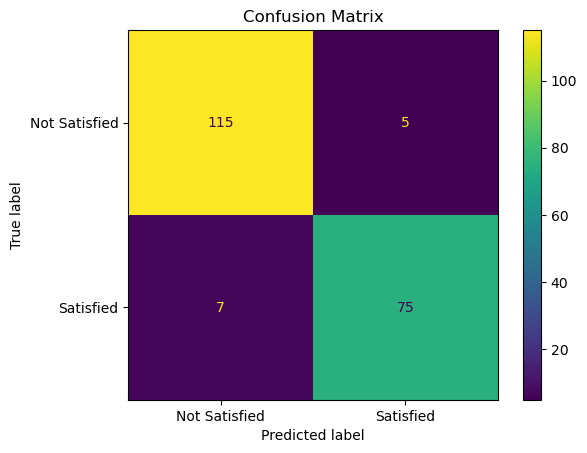

In [291]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_predict)
display_labels = ['Not Satisfied', 'Satisfied']
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()


In the confusion matrix, the model has made 115 true positive predictions and 75 true negative predictions. There were also 5 false positive predictions that the model predicted positive but the actual class was negative. And 7 false negative predictions is that the model predicted negative but the actual class was positive.

## Task 5. Conclusions


For the first tabular dataset there are three classification algorithems are used to calculate the bank customers satisfaction based on its various customer servicess. Firstly the SVM model achieved an accuracy of 0.793, indicating that it can correctly classify around 79.3% of the test data samples. Socendly the KNN model performed poorly with an accuracy of 0.507, suggesting that the model is not able to accurately predict the target values. And thirdly the random forest classifier achieved an accuracy of 0.818, which means that it can correctly predict the label of the service requests for about 82% of the cases.

When applying the K=10 cross-validation for each of the models, the SVM model achieved a mean accuracy of 0.780, indicating that it performs reasonably well on the dataset. The KNN model achieved a mean accuracy of 0.779, indicating that it can correctly classify around 78% of the samples on average. The random forest classifier achieved a mean accuracy of 0.80. Overall, the results of the K-fold cross-validation suggest that the models are performing reasonably well on the dataset.

In the second part text data from the comments dataset is being classified into "satisfied" or "not satisfied" using TF-IDF vectorization and a LinearSVC classifier. The model achieved a high accuracy score of 0.9405 on a single train-test result, indicating that the model is performing well in correctly classifying the test data. The 10-fold cross-validation result shows that the model can correctly classify 92.97% of the comments on average. 
